In [ ]:
!pip install numpy==1.19.3
!pip install fastparquet
!pip install python-snappy
# !pip install pymorphy2
!pip install scikit-learn==0.23.2
!pip install gensim==3.8.3

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\Rodion\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Using cached fastparquet-0.5.0.tar.gz (120 kB)
  Using cached numba-0.51.2.tar.gz (2.1 MB)
  Using cached thrift-0.13.0.tar.gz (59 kB)
  Using cached llvmlite-0.34.0.tar.gz (107 kB)
Using legacy 'setup.py install' for fastparquet, since package 'wheel' is not installed.
Using legacy 'setup.py install' for numba, since package 'wheel' is not installed.
Using legacy 'setup.py install' for llvmlite, since package 'wheel' is not installed.
Using legacy 'setup.py install' for thrift, since package 'wheel' is not installed.
    Running setup.py install for llvmlite: started
    Running setup.py install for llvmlite: finished with status 'error'


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\rodion\appdata\local\programs\python\python39\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Rodion\\AppData\\Local\\Temp\\pip-install-gg2kc65k\\llvmlite_cb0a3f71e2bb407097e09073fba78c23\\setup.py'"'"'; __file__='"'"'C:\\Users\\Rodion\\AppData\\Local\\Temp\\pip-install-gg2kc65k\\llvmlite_cb0a3f71e2bb407097e09073fba78c23\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\Rodion\AppData\Local\Temp\pip-record-8j4_u271\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\rodion\appdata\local\programs\python\python39\Include\llvmlite'
         cwd: C:\Users\Rodion\AppData\Local\Temp\pip-install-gg2kc65k\llvmlite_cb0a3f71e2bb407097e09073fba78c23\
    Complete output (27 lines):
    running ins

In [8]:
cur_submit = 'Submit8'
data_train_path = '../data_fusion_train.parquet'
w2v_path = f'w2v.model'

# Importing

In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Service tools
from tqdm.notebook import tqdm, trange
import logging, os, pickle, json
tqdm.pandas()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Work with text
import re
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('stopwords')

# Sklearn Pipelines & Preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import *

# Models & Metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# метрика задачи
def score(y_true, y_val):
    return f1_score(y_true, y_val, average='weighted')

# датафрейм, содержащий категорию n
def samples(n):
    return df[df.category_id == n]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rodion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* catboost
* xgboost
* lightgbm
* svm
* knn
* tfidf + linearsvc и word2vec + linearsvc

In [70]:
def read_save(read_path, to_drop=None, backup_path='../backup.csv'):
    df = pd.read_parquet(read_path)[['item_name', 'category_id']]
    df = df.drop_duplicates('item_name')
    df = df[df.category_id != -1]

    if to_drop is not None: 
        df = df.drop(to_drop, 1)
    df.to_csv(backup_path, index=False)
    logging.warning('To save RAM restart Notebook and then skip this cell')
    return df

df = read_save(data_train_path, backup_path='../backup_label.csv')

2021-03-05 22:02:11,876 : WARNING : To save RAM restart Notebook and then skip this cell


In [2]:
df = pd.read_csv('../backup_label.csv')
df.dropna(inplace=True)

# Preprocessing

In [3]:
from normalizationR import normalize
df.item_name = normalize(df.item_name)

E:\DataFusionHack\Submit8\normalizationR.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  return ser \


# Word2Vec

In [4]:
df.item_name = df.item_name.apply(lambda x: [i for i in x.split() if len(i) > 1])

In [35]:
# df.item_name = df.item_name.str.replace(r'[\W_]', ' ')

c:\users\rodion\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df[df.item_name.apply(lambda x: len(x) == 0)][['item_name', 'original']]

,item_name,original
2219,[],2
3160,[],К а п у ч и н о / с р е д н и й
6058,[],7
6293,[],?????? ????????
6583,[],--------
10030,[],1.
13444,[],3#
15426,[],4#
15558,[],0
20625,[],С А М С А


In [39]:
df = [i for i in df.item_name.tolist() if len(i) > 0]

In [15]:
model = Word2Vec(df.item_name, size=200, window=35, min_count=2, workers=12, iter=50, sg=1)

2021-03-12 18:20:36,563 : INFO : collecting all words and their counts
2021-03-12 18:20:36,564 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-03-12 18:20:36,580 : INFO : PROGRESS: at sentence #10000, processed 48873 words, keeping 13656 word types
2021-03-12 18:20:36,596 : INFO : PROGRESS: at sentence #20000, processed 97953 words, keeping 21050 word types
2021-03-12 18:20:36,611 : INFO : PROGRESS: at sentence #30000, processed 147191 words, keeping 26640 word types
2021-03-12 18:20:36,628 : INFO : PROGRESS: at sentence #40000, processed 197497 words, keeping 31690 word types
2021-03-12 18:20:36,646 : INFO : PROGRESS: at sentence #50000, processed 247774 words, keeping 36148 word types
2021-03-12 18:20:36,664 : INFO : PROGRESS: at sentence #60000, processed 298022 words, keeping 40198 word types
2021-03-12 18:20:36,683 : INFO : PROGRESS: at sentence #70000, processed 347808 words, keeping 44163 word types
2021-03-12 18:20:36,702 : INFO : PROGRESS: at se

In [23]:
model.save(f'w2v.model')

2021-03-12 18:47:58,846 : INFO : saving Word2Vec object under w2v.model, separately None
2021-03-12 18:47:58,847 : INFO : storing np array 'vectors' to w2v.model.wv.vectors.npy
2021-03-12 18:47:59,894 : INFO : not storing attribute vectors_norm
2021-03-12 18:47:59,895 : INFO : storing np array 'syn1neg' to w2v.model.trainables.syn1neg.npy
2021-03-12 18:48:01,003 : INFO : not storing attribute cum_table
2021-03-12 18:48:01,386 : INFO : saved w2v.model


In [9]:
model = Word2Vec.load(w2v_path, mmap='r')

2021-03-12 23:41:13,214 : INFO : loading Word2Vec object from w2v.model
2021-03-12 23:41:13,697 : INFO : loading wv recursively from w2v.model.wv.* with mmap=r
2021-03-12 23:41:13,698 : INFO : loading vectors from w2v.model.wv.vectors.npy with mmap=r
2021-03-12 23:41:13,700 : INFO : setting ignored attribute vectors_norm to None
2021-03-12 23:41:13,700 : INFO : loading vocabulary recursively from w2v.model.vocabulary.* with mmap=r
2021-03-12 23:41:13,701 : INFO : loading trainables recursively from w2v.model.trainables.* with mmap=r
2021-03-12 23:41:13,702 : INFO : loading syn1neg from w2v.model.trainables.syn1neg.npy with mmap=r
2021-03-12 23:41:13,703 : INFO : setting ignored attribute cum_table to None
2021-03-12 23:41:13,704 : INFO : loaded w2v.model


In [10]:
X = df[df.category_id != -1].item_name
y = df[df.category_id != -1].category_id

In [11]:
logs = []
def word_averaging(wv, words):
    mean = np.zeros((wv.vector_size,))
    
    for word in words:
        if word in wv.vocab:
            mean += model.wv.get_vector(word)
        else:
            logs.append(word)

    if all(mean == 0.):
        logging.warning("cannot compute similarity with no input %s", words)
        return mean

    mean = gensim.matutils.unitvec(mean)
    return mean

def word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list])

In [12]:
X_wv = word_averaging_list(model.wv, X.values)

2021-03-12 23:41:15,376 : WARNING : cannot compute similarity with no input ['ликвигад']
2021-03-12 23:41:15,448 : WARNING : cannot compute similarity with no input ['авточизбургер']
2021-03-12 23:41:15,450 : WARNING : cannot compute similarity with no input []
2021-03-12 23:41:15,461 : WARNING : cannot compute similarity with no input ['полуступица']
2021-03-12 23:41:15,512 : WARNING : cannot compute similarity with no input ['батарейкисолев10штти']
2021-03-12 23:41:15,554 : WARNING : cannot compute similarity with no input ['молшоксфундиз90г']
2021-03-12 23:41:15,556 : WARNING : cannot compute similarity with no input ['ринструмдлточнмеха']
2021-03-12 23:41:15,643 : WARNING : cannot compute similarity with no input []
2021-03-12 23:41:15,649 : WARNING : cannot compute similarity with no input ['карамфруккартинки100']
2021-03-12 23:41:15,656 : WARNING : cannot compute similarity with no input []
2021-03-12 23:41:15,671 : WARNING : cannot compute similarity with no input []
2021-03-12 

# Feature Engineering

add "does contain №"

In [ ]:
for i in ['мг', 'л']:
    df[f'has_{i}'] = df.original\
                                .str.contains(fr'\d\s?{i}\b')\
                                .astype(int)

df['val_%'] = df.original\
                        .str.extract(r'((?:\d+[\.,])?\d+)\s*%', expand=False)\
                        .str.replace(',', '.')\
                        .astype(float)\
                        .fillna(0)

df['is_integer'] = df.item_quantity\
                      .apply(lambda x: int(x.is_integer()))

In [ ]:
features = ['receipt_dayofweek', 'receipt_time', 'item_quantity', 'item_price', 'item_nds_rate', 'has_мг', 'has_л', 'val_%', 'is_integer']

In [ ]:
df.receipt_time = pd.cut(df.receipt_time, [0, 6, 12, 18, 23], include_lowest=True)
df[['receipt_dayofweek', 'item_price', 'item_nds_rate']] = df[['receipt_dayofweek', 'item_price', 'item_nds_rate']].astype('O')

In [ ]:
from collections import Counter
w_slash_w = df.original.str.extract(r'(\w+/\w+)').value_counts()[:10].index
w_slash_w_pat = '|'.join(i[0] for i in w_slash_w)

spam = df.original\
    .str.lower()\
    .str.findall(w_slash_w_pat).tolist()

X_slash = DictVectorizer().fit_transform([Counter(s) for s in spam]).toarray()

In [ ]:
X = np.hstack((X_wv, pd.get_dummies(df[features], drop_first=True)))

In [ ]:
# X = np.hstack((X_wv,df[features].values))

# Modeling

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_wv, y, random_state=0, stratify=y)

In [34]:
%%time
pipe = make_pipeline(
    OneVsRestClassifier(
        LinearSVC(random_state=0),
        n_jobs=4
    )
)
cross_val_score(pipe, X_train, y_train, cv=3, n_jobs=3, scoring='f1_weighted')

Wall time: 15.5 s


array([0.82058196, 0.81822374, 0.8255919 ])

In [ ]:
def GridSearchPipe(pipe, model, params):
    

In [81]:
svc = OneVsRestClassifier(
        LinearSVC(random_state=0),
        n_jobs=12
)

In [94]:
pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(5, n_jobs=12)
)

In [ ]:
%%time
params = {'kneighborsclassifier__n_neighbors': [3, 4]}
          
grid = GridSearchCV(pipe, 
                    params,
                    scoring='f1_weighted', 
                    cv=StratifiedKFold(3, shuffle=True),
                    verbose=100)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] kneighborsclassifier__n_neighbors=3 .............................


In [34]:
%%time
svc = OneVsRestClassifier(
        LinearSVC(random_state=0),
        n_jobs=12
    )
GridSearchCV(pipe, params=)

Wall time: 47 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=LinearSVC(random_state=0),
                                     n_jobs=12))])

In [35]:
%%time
y_pred = pipe.predict(X_val)

Wall time: 348 ms


In [338]:
# svc = LinearSVC(random_state=0)
# svc.fit(X_train, y_train)
pred = svc.decision_function(X_val)

In [339]:
def sigmoid(x): return 1 / (1 + np.exp(-x))

pred = sigmoid(pred)

In [285]:
mapping = dict(zip(range(y.nunique()), sorted(y.unique())))

In [276]:
def num2cat(arr, mapping): return list(map(lambda x: mapping[x], arr))

In [169]:
def multi_se(arr1, arr2): return (arr1.std()**2 / len(arr1) + arr2.std()**2 / len(arr2)) ** 0.5

In [173]:
def t_score(mean_1, mean_2, se): return (mean_1 - mean_2) / se

In [171]:
se = multi_se(ne_200, with_200)

In [174]:
t_score(ne_200.mean(), with_200.mean(), se)

-23.711877859953393

In [191]:
df = len(ne_200) + len(with_200) - 2

In [151]:
ne_200 = pred[y_val.ne(204).values].ravel()
with_200 = pred[y_val.eq(204).values][:, :-1].ravel()

In [153]:
def weights(arr): return np.ones_like(arr) / len(arr)

Text(0.5, 1.0, 'Распределение вероятностей (нормированное по Оy)')

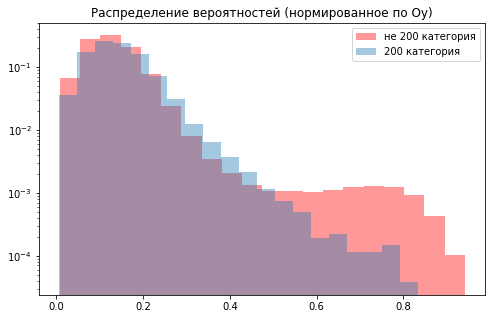

In [161]:
plt.figure(figsize=(8,5))
plt.hist(ne_200, bins=20, alpha=0.4, weights=weights(ne_200), color='r', label='не 200 категория')
plt.hist(with_200, bins=20, alpha=0.4, weights=weights(with_200), label='200 категория')
plt.legend()
plt.yscale('log')
plt.title('Распределение вероятностей (нормированное по Оy)')

Text(0, 0.5, 'Средняя вероятность')

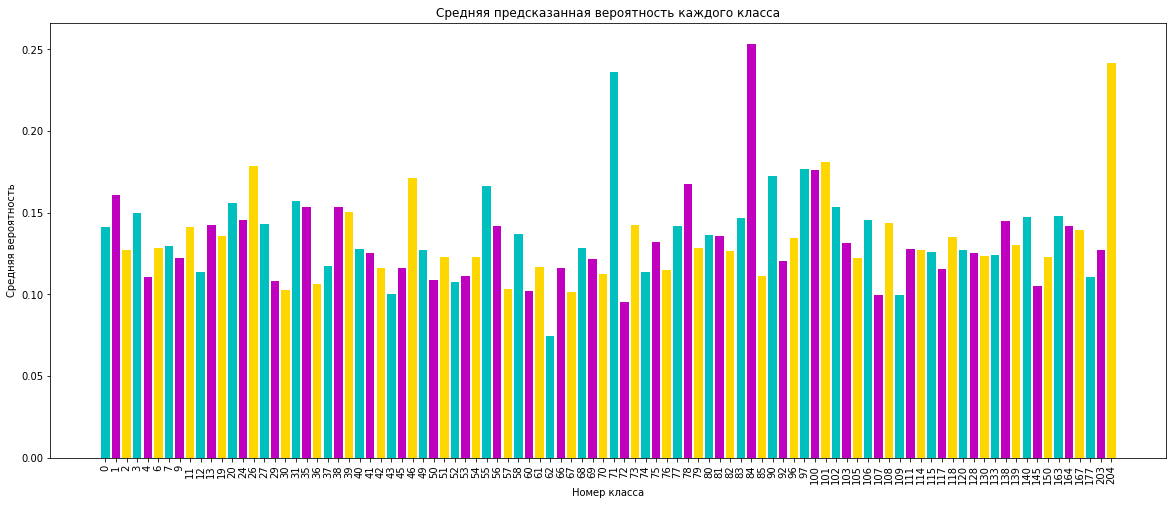

In [257]:
plt.figure(figsize=(20,8))
plt.bar(mapping.keys(), pred.mean(0), color=['c', 'm', 'gold'])
plt.xticks(list(mapping.keys()), labels=list(mapping.values()), rotation=90);
plt.title('Средняя предсказанная вероятность каждого класса')
plt.xlabel('Номер класса')
plt.ylabel('Средняя вероятность')

Text(0.5, 1.0, 'Предсказание вероятностей каждой категории для 204 категории')

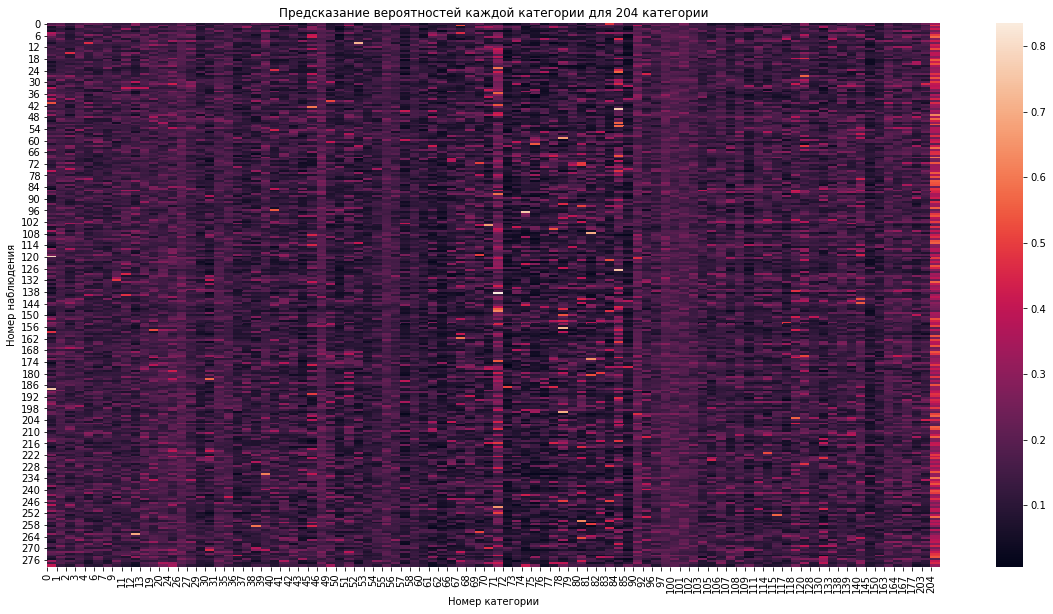

In [118]:
plt.figure(figsize=(20,10))
sns.heatmap(pred[y_val.eq(204).values])
plt.xticks(list(mapping.keys()), labels=map(str, mapping.values()), rotation=90);
plt.xlabel('Номер категории')
plt.ylabel('Номер наблюдения')
plt.title('Предсказание вероятностей каждой категории для 204 категории')

In [224]:
inv_mapping = {j: i for i, j in mapping.items()}
inv_mapping[204]

95

Text(0.5, 1.0, 'Предсказание вероятностей каждой категории НЕ для 204 категории')

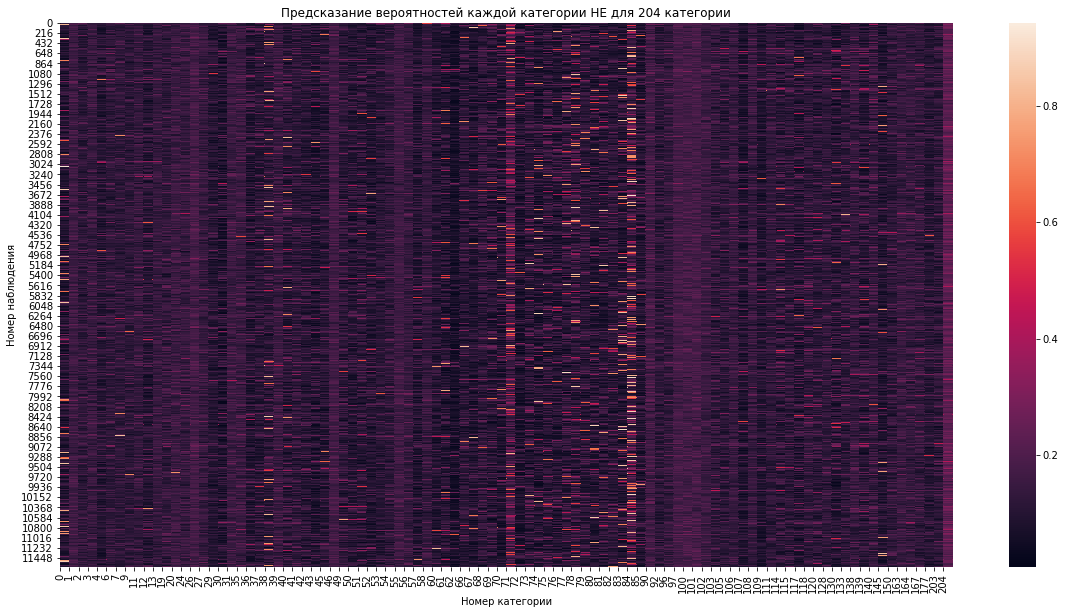

In [119]:
plt.figure(figsize=(20,10))
sns.heatmap(pred[y_val.ne(204).values])
plt.xticks(list(mapping.keys()), labels=map(str, mapping.values()), rotation=90);
plt.xlabel('Номер категории')
plt.ylabel('Номер наблюдения')
plt.title('Предсказание вероятностей каждой категории НЕ для 204 категории')

In [ ]:
svc = make_pipeline LinearSVC(random_state=0)

# cross_val_score(svc, X_train, y_train, cv=3, n_jobs=-1, scoring='f1_weighted')

In [37]:
%%time
knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(weights='distance', n_jobs=-1)
)
cross_val_score(knn, 
                X_wv, 
                y, 
                cv=StratifiedKFold(5, 
                                   shuffle=True, 
                                   random_state=0), 
                scoring='f1_weighted'
)

Wall time: 2min 23s


array([0.83642055, 0.82541101, 0.83356311, 0.82696494, 0.83154479])

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.1, tree_method='gpu_hist', gpu_id=0, random_state=0)
xgb.fit(X_train, y_train, eval_set=[(X_val[:5000], y_val[:5000])], eval_metric='mlogloss', early_stopping_rounds=5)

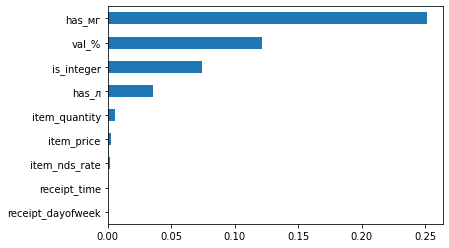

In [ ]:
pd.Series(
    dict(
        zip(
            features,
            xgb.feature_importances_[150:]
            )
        )
    ).sort_values().plot.barh()

In [ ]:
def show_cats(n=10):
    for label in labels:
        print(label)
        print(*df[df.category_id == label].sample(10).original.values, sep='\n', end='\n\n')

In [ ]:
show_cats()

84
Хлеб 1 кусочек*
Хлеб Домашний Корсаков
Крекеры льняные с шоколадной глазурью 50 г
Печ. Орешки с вар. сгущ. 1кг
Марм.УДАРНИЦАябл.325 
Яйцо шок Киндер-сюрприз 20г лицензия Ферреро
Жито в/с (0,4 кг) Х/б издел Тульский Мастер  г.Тула
Булочка Ромашка (магазин Болашак ) 1шт
 Хлебцы Здоров.край зернов.0,26
 Батон"Нарезной"тос.в/с400Хл

71
Морковь по-домашнему вес. кг
 ТУШЕНАЯ ВЫСШИЙ СОРТ 338 Г
Салат "Розовая креветка" с соусом "Цезарь",шт
Гречка отварная с маслом Уже Г
Салат "Виктория" (краб.палочки, капуста св, кукуруза конс, майон
Лосось и сливочный сыр
Котлета по-киевс
Суп-Лапша с курицей 500/50 гр.
2 Картофельное пюре
Салат Оригинальный

78
Сметана 20гр, 32 ккал
Молоко 3.2% 900 мл бутылка
150Г ШОК/ДЕСЕРТ МОНТЕ 13.3%
930Г П/МОЛОКО В/МОЛОЧНИК ОТБОР
         Сыр чечил косичка ко
ТВОРОГ ОБЕЗЖИРЕН
Простокваша Просто молоко мечниковская 4% тба 450 г
творог Село зелёное зерненый 5% 130г
ЯЙЦО С1 ПО 10ШТ ЯРАТ
 ВОЛЖ.Молоко пит.паст.2,5% 800мл

83
 GL.VIL.Морс клюквенный 0,2л
Морс ягодный(KО)1шт


In [ ]:
class XGBCustom(XGBClassifier):
    def fit(self, X, y):
        super().fit(X, y, eval_set=[(X_val[:5000], y_val[:5000])], eval_metric='mlogloss', early_stopping_rounds=5)
        return self

In [ ]:
xgb = XGBCustom(n_estimators=500, tree_method='gpu_hist', gpu_id=0, random_state=0)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid = RandomizedSearchCV(xgb, params,
                          scoring='f1_weighted',
                          cv=StratifiedKFold(3, random_state=0),
                          n_iter=10,
                          verbose=10)
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_score_)
grid.best_params_

In [ ]:
f1_score(y_val[5000:], xgb.predict(X_val[5000:]), average='weighted')

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1, weights='distance')
params = {'n_neighbors': np.arange(1, 5, 1),
          'p': [2, 3, 4, 5]}
grid = RandomizedSearchCV(knn, params, 
                          scoring='f1_weighted', 
                          cv=StratifiedKFold(2),
                          random_state=0, 
                          n_iter=10, 
                          verbose=10)
grid.fit(X_train, y_train)

In [ ]:
a = []
for i in np.arange(2, 10, 1):
  knn = KNeighborsClassifier(i, weights='distance', n_jobs=-1)
  knn.fit(X_train, y_train)
  score = f1_score(y_val, knn.predict(X_val), average='weighted')
  a.append([i, score])
  print(score)

0.7793225115321927
0.7902887822792757
0.7953673869249703
0.7961902642741363
0.7972403892622326
0.7945329520887592
0.7937775295897517
0.7941808278287039


In [ ]:
knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(4, weights='distance', n_jobs=-1)
)
knn.fit(X_train, y_train)
f1_score(y_val, knn.predict(X_val), average='weighted')
# 120 признаков w2v, sg=1, iter=10, на всём датафрейме; подсчёт среднего вручную

0.7980123866188901

In [ ]:
rf = GaussianNB()
rf.fit(X_train, y_train)
f1_score(y_val, rf.predict(X_val), average='weighted')

0.7505659918551628

In [ ]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
f1_score(y_val, svc.predict(X_val), average='weighted')

0.8187797998743522

# Tfidf

In [23]:
def make_trans():
    a = 'a b c d e f g h i j k l m n o p q r s t u v w x y z ё'.split()
    b = 'а в с д е ф г н и ж к л м н о р к р с т у в в х у з е'.split()
    trans_dict = dict(zip(a, b))
    trans_table = ''.join(a).maketrans(trans_dict)
    return trans_table

def normalize(ser: pd.Series):
#   "СокДобрый" -> "Сок Добрый"
    camel_case_pat = re.compile(r'([а-яa-z])([А-ЯA-Z])')
#   "lmno" -> "лмно"
    trans_table = make_trans()
#   "14х15х30" -> "DxDxD"
    dxdxd_pat = re.compile(r'((?:\d+\s*[х\*]\s*){2}\d+)')
#   "1.2 15,5" -> "1p2 15p5"  
    digit_pat = re.compile(r'(\d+)[\.,](\d+)')
#   "15 мл" -> "15мл"
    unit = 'мг|г|гр|кг|мл|л|шт'
    unit_pat = re.compile(fr'((?:\d+p)?\d+)\s*({unit})\b')
#   "ж/б ст/б" -> "жб стб"
    w_w_pat = re.compile(r'\b([\dа-я]{1,2})/([\dа-я]{1,2})\b')
#   "a b c d" -> "abcd"
    glue_pat = re.compile(r'(?<=(?<!\w)\w) (?=\w(?!\w))', re.UNICODE)
    
    return ser \
            .str.replace(camel_case_pat, r'\1 \2') \
            .str.lower() \
            .str.replace(r'ъ\b', '') \
            .str.translate(trans_table) \
            .str.replace(dxdxd_pat, ' DxDxD ') \
            .str.replace(r'№\s*(\d+)', r' NUM\1 ') \
            .str.replace('%', ' PERC ') \
            .str.replace(digit_pat, r' \1p\2 ') \
            .str.replace(unit_pat, r' \1\2 ') \
            .str.replace(w_w_pat, r' \1\2 ') \
            .str.replace(r'[\W_]', ' ') \
            .str.replace(r'(\d)([а-я])|([а-я])(\d)', r'\1\3 \2\4') \
            .str.replace(glue_pat, '') \

df = pd.read_csv('../backup_label.csv')
df.item_name = normalize(df.item_name)

<ipython-input-23-91c43c82431f>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  return ser \


In [24]:
class SVC_Custom(LinearSVC):
    def predict(self, X):
        return self.decision_function(X)

In [25]:
pipe = make_pipeline(
    TfidfVectorizer(ngram_range=(3, 5), analyzer='char_wb'),
    SVC_Custom(random_state=0)
)

spam = cross_val_predict(pipe, 
                df.item_name, 
                df.category_id, 
#                 scoring='f1_weighted', 
                cv=StratifiedKFold(5, shuffle=True, random_state=0), 
                n_jobs=5)
# spam.mean(), spam

In [26]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
spam = sigmoid(spam)

In [60]:
score(df.category_id, y_pred)

0.8385675712915494

In [34]:
spam[:, :-1].mean(1).

(47668,)

In [47]:
means = spam[:, :-1].mean(1)

In [52]:
y_pred[means > 0.1]

TypeError: only integer scalar arrays can be converted to a scalar index

In [56]:
spam[:, -1].

(47668,)

In [59]:
max(b)

0.8385675712915494

In [58]:
def postprocessing(spam):
    n2cat = dict(zip(range(df.category_id.nunique()), sorted(df.category_id.unique())))
    y_pred = list(map(lambda x: n2cat[x], spam.argmax(1)))
    return np.array(y_pred)

def testing_thr(spam):
    b=  []
    means = spam[:, :-1].mean(1)
    for thr in np.arange(0.1, 1., 0.1):
        for thr2 in np.arange(0.1, 1., 0.1):
            y_pred = postprocessing(spam)
            y_pred[(means > thr) & (spam[:, -1] > thr2)] = 204
            b.append(score(df.category_id, y_pred))
    return b
b = testing_thr(spam)

In [307]:
pipe = make_pipeline(
    TfidfVectorizer(ngram_range=(3, 5), analyzer='char_wb'),
    LinearSVC(random_state=0)
)

spam = cross_val_score(pipe, 
                df.item_name, 
                df.category_id, 
                scoring='f1_weighted', 
                cv=StratifiedKFold(5, shuffle=True, random_state=0), 
                n_jobs=5)
spam.mean(), spam

(0.8230282944939395,
 array([0.82749248, 0.8141208 , 0.82442179, 0.81670552, 0.83240089]))

In [9]:
pipe.fit(df.item_name, df.category_id)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 6))),
                ('linearsvc', LinearSVC(random_state=0))])

In [10]:
pickle.dump(pipe, open(f'clf_task1', 'wb'))

In [ ]:
df['has_%'] = df.item_name.str.contains(r'\d\s*%')

for i in ['мг', 'г', 'гр', 'кг', 'мл', 'л']:
    df[f'has_{i}'] = df.item_name.str.contains(fr'\d\s*{i}\b')

In [ ]:
df['val_%'] = df.item_name.str.extract(r'((?:\d+[\.,])?\d+)\s*%', expand=False).str.replace(',', '.').astype(float)

for i in ['мг', 'г', 'кг', 'мл', 'л']:
    df[f'val_{i}'] = df.item_name.str.extract(fr'((?:\d+[\.,])?\d+)\s*{i}\b', expand=False).str.replace(',', '.').astype(float)

In [ ]:
df['is_integer'] = df.item_quantity.apply(lambda x: x.is_integer())

In [ ]:
del df['val_kg']
del df['val_l']
del df['val_mg']

# SVC

In [113]:
y_train = y_train.iloc[~(X_train == 0).all(1)]
X_train = X_train[~(X_train == 0).all(1)]

In [14]:
pipe = make_pipeline(
    StandardScaler(),
    SVC(random_state=0),
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [17]:
pickle.dump(pipe, open(f'clf_task1', 'wb'))

In [26]:
%%time
cross_val_score(pipe, 
                X_train, 
                y_train, 
                cv=StratifiedKFold(5, 
                                   shuffle=True, 
                                   random_state=0), 
                scoring='f1_weighted',
                n_jobs=5
)

Wall time: 3min 45s


array([0.84220245, 0.85083903, 0.83290699, 0.84508513, 0.84758615])

In [115]:
%%time
# w2v 200size, 50iter
score(y_val, pipe.predict(X_val))

Wall time: 2min 11s


0.8512973516515794

In [123]:
pickle.dump(pipe, open(f'clf_task1', 'wb'))

# Error Analysis

In [ ]:
y_pred = cross_val_predict(pipe, X_wv, y, cv=StratifiedKFold(3, shuffle=True, random_state=0), n_jobs=-1)

In [90]:
df=pd.read_csv('../error_anal.csv')

In [68]:
idx = df.category_id.value_counts()[:15].index

In [69]:
spam = df.category_id.isin(idx)

In [70]:
spam_df = df.copy()

In [71]:
spam_df = spam_df.loc[spam]

In [72]:
spam_df.loc[~spam_df.y_svc.isin(idx), 'y_svc'] = -1

In [75]:
(spam_df.category_id==0).sum()

2352

In [74]:
print(classification_report(spam_df.category_id, spam_df.y_svc))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.96      0.95      0.96      2352
          38       0.99      0.96      0.98      2265
          61       0.98      0.89      0.93       918
          70       0.96      0.88      0.92       887
          71       0.89      0.85      0.87      4760
          73       0.89      0.73      0.81      1109
          74       0.93      0.91      0.92      1008
          77       0.91      0.86      0.88      1187
          78       0.95      0.94      0.95      2866
          80       0.93      0.92      0.92      1841
          81       0.92      0.85      0.88      1128
          83       0.94      0.95      0.94      2856
          84       0.93      0.95      0.94      7070
         130       0.95      0.86      0.90       861
         204       0.72      0.56      0.63      1118

    accuracy                           0.90     32226
   macro avg       0.87   

c:\users\rodion\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


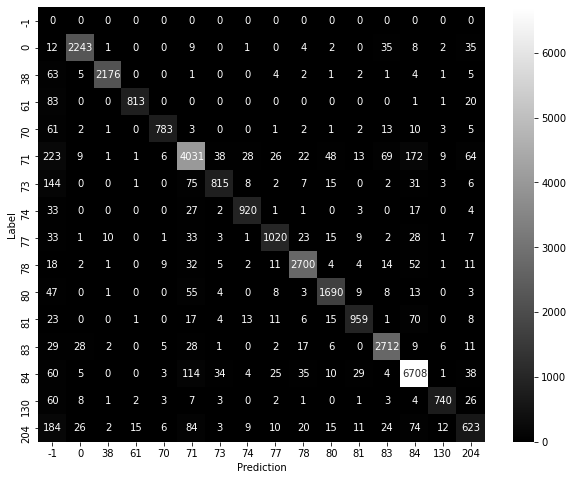

In [82]:
conf = confusion_matrix(spam_df.category_id, spam_df.y_svc)
plt.figure(figsize=(10, 8))
sns.heatmap(conf, xticklabels=[-1] + sorted(idx), yticklabels=[-1] + sorted(idx), 
             cmap='gray', fmt='g', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

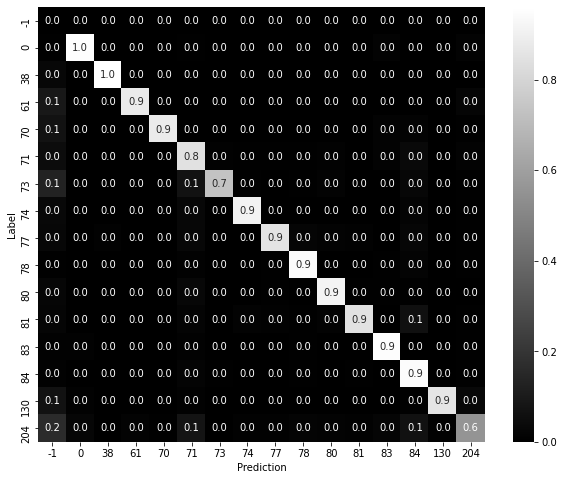

In [86]:
conf = confusion_matrix(spam_df.category_id, spam_df.y_svc, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(conf, xticklabels=[-1] + sorted(idx), yticklabels=[-1] + sorted(idx), 
             cmap='gray', fmt='.1f', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
cross_val_score(pipe, X_wv, y, cv=StratifiedKFold(3, random_state=0), n_jobs=-1, scoring='f1_weighted')

array([0.8533548 , 0.84327629, 0.8312009 ])

In [ ]:
pipe.fit(X_wv, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [ ]:
!zip submit.zip clf_task1 w2v.model *.npy

  adding: clf_task1 (deflated 32%)
  adding: w2v.model (deflated 68%)
  adding: w2v.model.trainables.syn1neg.npy (deflated 7%)
  adding: w2v.model.wv.vectors.npy (deflated 7%)


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class LogEncoder(TransformerMixin):
    def __init__(self):
        self.cat2bin = None

    def fit(self, X):
        unique = np.unique(X)
        nunique = unique.size
        len_ = int(np.ceil(np.log2(nunique)))
        self.cat2bin = {i: list(map(int, (bin(j)[2:].zfill(len_)))) 
                      for i, j in zip(unique, range(nunique))}
        return self

    def transform(self, X):
        return np.array([self.cat2bin[x] for x in X])

In [ ]:
# def num_column_transform(df):
#     df.receipt_time = df.receipt_time.str[:2].astype('uint8')
#     df.receipt_dayofweek = df.receipt_dayofweek.astype('uint8')
#     df.category_id = df.category_id.astype('uint8')
#     df.item_price = df.item_price.astype('uint8')
#     df.item_nds_rate = df.item_nds_rate.astype('int8')

# Stacking

In [ ]:
class MySVC(SVC):
    def predict(self, X):
        return super().decision_function(X)

In [ ]:
pipe = make_pipeline(
    StandardScaler(),
    MySVC(random_state=0)
)

In [ ]:
svc_pred = cross_val_predict(pipe, X_wv, y, cv=StratifiedKFold(3), n_jobs=-1)

In [ ]:
class MyKNN(KNeighborsClassifier):
    def predict(self, X):
        return super().predict_proba(X)

In [ ]:
pipe_knn = make_pipeline(
    StandardScaler(),
    MyKNN(weights='distance', n_jobs=-1)
)

In [ ]:
knn_pred = cross_val_predict(pipe_knn, X_wv, y, cv=StratifiedKFold(3))

предсказания соседей

In [ ]:
score(df.category_id, pd.Series(knn_pred.argmax(1)).map(dict(zip(range(100), sorted(df.category_id.unique())))))

0.8211628395270225

предсказания svc

In [ ]:
score(df.category_id, df.pred)

0.8428780850572766

In [ ]:
n2cat = dict(zip(range(100), sorted(y.unique())))
uniques = sorted(y.unique())

In [ ]:
logregs = [XGBClassifier() for _ in range(96)]

In [ ]:
svc_train, svc_test, knn_train, knn_test, y_train, y_test = train_test_split(svc_pred, knn_pred, y, random_state=0, stratify=y)

In [ ]:
def fitting()
    for n, logreg in enumerate(tqdm(logregs)):
        X_spam = np.hstack((svc_train[:, [n]], knn_train[:, [n]]))
        y_spam = (y_train == n2cat[n]).astype(int)
        logreg.fit(X_spam, y_spam)

fitting()

100%|██████████| 96/96 [01:34<00:00,  1.02it/s]


In [ ]:
def predict_proba():
    spam = []
    for n, logreg in enumerate(logregs):
        X_spam = np.hstack((svc_test[:, [n]], knn_test[:, [n]]))
        spam.append(logreg.predict_proba(X_spam)[:, 1])
    return spam

spam = predict_proba()

In [ ]:
stack_pred = [n2cat[n] for n in np.stack(spam).argmax(0)]

предсказания xgboost, на svc+knn

In [ ]:
score(y_test, stack_pred)

0.8457505884406483

# Pytorch

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)

In [ ]:
def f1_torch(y_pred, y_true, weights=None):
    tp = torch.sum(y_true * y_pred, 0)
    tn = torch.sum((1-y_true) * (1-y_pred), 0)
    fp = torch.sum((1-y_true) * y_pred, 0)
    fn = torch.sum(y_true * (1-y_pred), 0)

    p = tp / (tp + fp + 1e-8)
    r = tp / (tp + fn + 1e-8)

    f1 = 2 * p * r / (p + r + 1e-8)
    # f1 = np.sum(f1*weights/sum(weights))
    return 1 - f1.mean()

In [ ]:
def dataloader(X, y, batch_size):
    idx = np.random.permutation(len(X))
    X = X[idx]
    y = y[idx]
    for i in range(len(X) // batch_size):
        num = batch_size * i
        yield X[num:num+batch_size], y[num:num+batch_size]

In [ ]:
from IPython.display import clear_output

def plot_lc(tr_loss, val_loss):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(tr_loss, label='Train f1')
    ax.plot(val_loss, label='Val f1')
    ax.set_xlabel('Num epoch')
    ax.set_ylabel('Loss')
    fig.suptitle(f'Epoch: {len(tr_loss)} Val f1: {1-acc[-1]:.3f}')
    plt.axis('on')
    ax.legend()
    plt.show()


def forward_epoch(model, loss_fn, opt, data, steps, losses, phase):
    if phase == 'train':
        model.train()
    else:
        model.eval()
    
    epoch_loss = 0.
    epoch_acc = 0.
    for step, (X, y) in enumerate(dataloader(*data, batch_size)):
        X = torch.cuda.FloatTensor(X)
        y = torch.cuda.LongTensor(y)
        opt.zero_grad()

        with torch.set_grad_enabled(phase == 'train'):
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            if phase == 'train':
                loss.backward()
                opt.step()
            
            epoch_loss += loss.item()
            if phase == 'val':
                epoch_acc += f1_torch(y_pred, y).item()
        if step + 1 == steps: 
            break
    # losses.append(epoch_loss / len(dataloader))
    losses.append(epoch_loss / (len(data[0]) // batch_size))
    if phase == 'val':
        acc.append(epoch_acc / (len(data[0]) // batch_size))

def train(model, loss_fn, opt, num_epoch, train_dl, val_dl, scheduler=None, train_steps=None, val_steps=None):
    # t = trange(num_epoch, unit='epoch')
    for epoch in range(num_epoch):
        forward_epoch(model, loss_fn, opt, train_dl, train_steps, tr_loss, phase='train')
        forward_epoch(model, loss_fn, opt, val_dl, val_steps, val_loss, phase='val')
        if scheduler is not None:
            scheduler.step(val_loss[-1])
        if epoch % 50 == 49:
            clear_output()
            plot_lc(tr_loss, val_loss)

        # if val_loss[-1] < min(val_loss[:-1]):
        #     torch.save(model, save_path)
        #     print('Model saved')
        # t.set_description(f'{tr_loss[-1]:.3f}/{val_loss[-1]:.3f}')
        # t.update(1)

In [ ]:
N = 160
P = 0.25

def in_block():
  return nn.Sequential(
    nn.Dropout(P),
    nn.Linear(120, N),
    nn.Sigmoid()
    )

def mid_block():
  return nn.Sequential(
    nn.Dropout(P),
    nn.BatchNorm1d(N),
    nn.Linear(N, N),
    nn.Sigmoid()
)
  
def out_block():
  return nn.Sequential(
    nn.Dropout(P),
    nn.BatchNorm1d(N),
    nn.Linear(N, 96),
    nn.Sigmoid()
)

net = nn.Sequential(
    in_block(),
    mid_block(),
    mid_block(),
    out_block()
).cuda()

opt = torch.optim.Adam(net.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=100, factor=0.5)

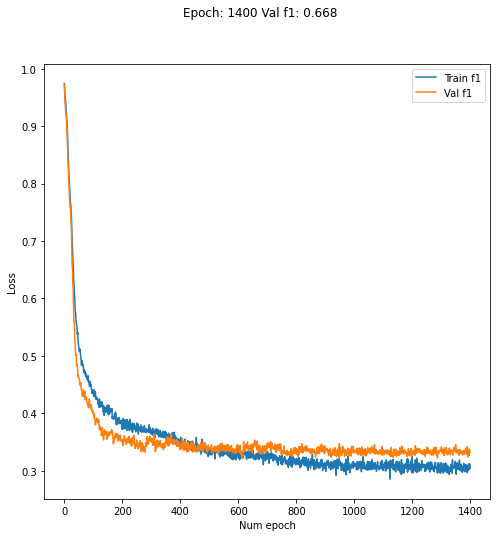

KeyboardInterrupt: ignored

In [ ]:
if True:
    tr_loss = []
    val_loss = []
    acc = []

batch_size=10000

loss = torch.nn.BCEWithLogitsLoss()
train(net, f1_torch, opt, 2000, (X_train, y_train), (X_val, y_val), scheduler)